Notebook for Sectio Data Exploration for now

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_147454/1144322908.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/sectio_cesarea/cesarean_section.csv", delimiter=";")


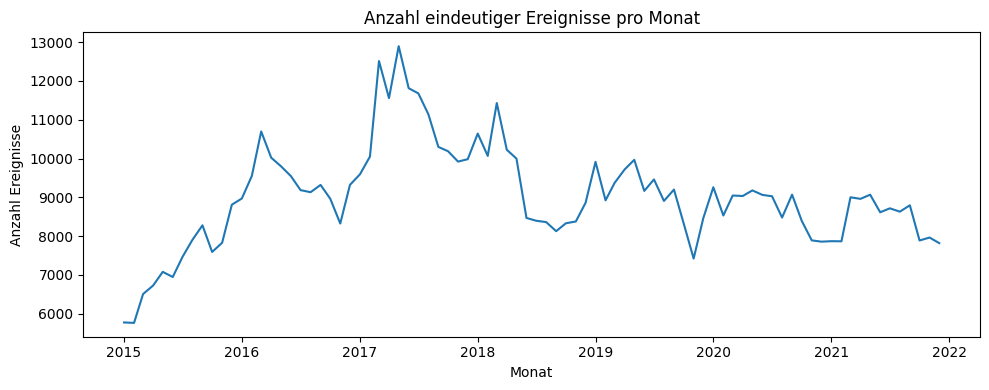

In [ ]:
df = pd.read_csv("../data/sectio_cesarea/cesarean_section.csv", delimiter=";")
df["ANO_MES_EVENTO"] = pd.to_datetime(df["ANO_MES_EVENTO"])

events_per_month = df.groupby("ANO_MES_EVENTO")["ID_EVENTO_ATENCAO_SAUDE"].nunique()

plt.figure(figsize=(10,4))
sns.lineplot(x=events_per_month.index, y=events_per_month.values)
plt.title("Anzahl Ereignisse pro Monat")
plt.xlabel("Monat")
plt.ylabel("Anzahl Ereignisse")
plt.tight_layout()
plt.show()

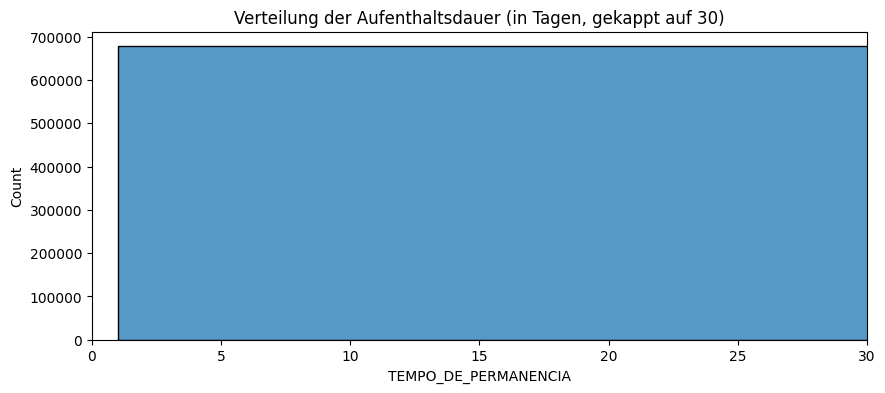

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=df[df["TEMPO_DE_PERMANENCIA"] >= 0], 
             x="TEMPO_DE_PERMANENCIA", bins=50)
plt.xlim(0, 30)  # z.B. auf 30 Tage begrenzen, um den "Kern" zu sehen
plt.title("Verteilung der Aufenthaltsdauer (in Tagen, gekappt auf 30)")
plt.show()

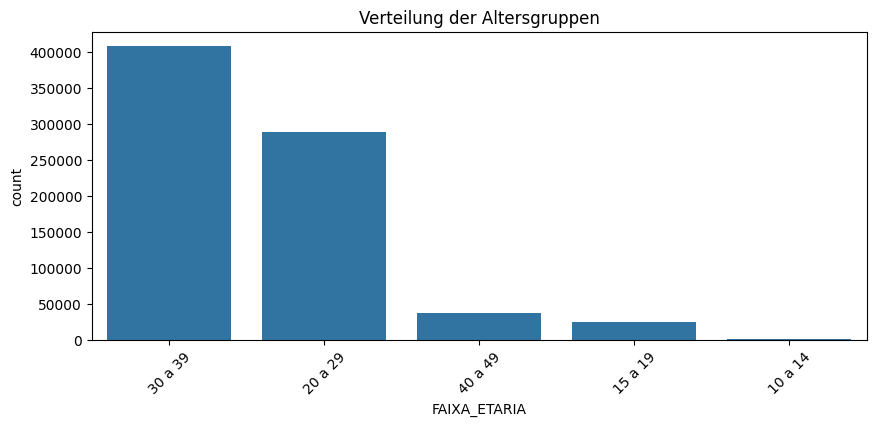

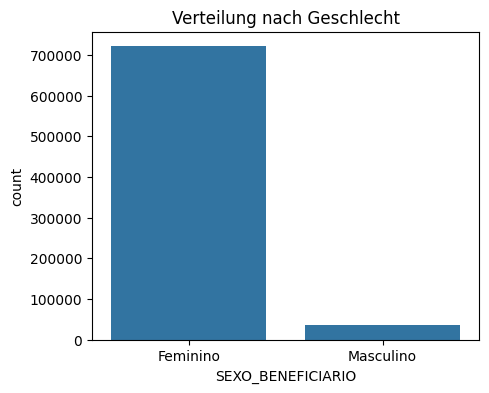

In [15]:

plt.figure(figsize=(10,4))
sns.countplot(data=df, x="FAIXA_ETARIA",
              order=df["FAIXA_ETARIA"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Verteilung der Altersgruppen")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="SEXO_BENEFICIARIO")
plt.title("Verteilung nach Geschlecht")
plt.show()

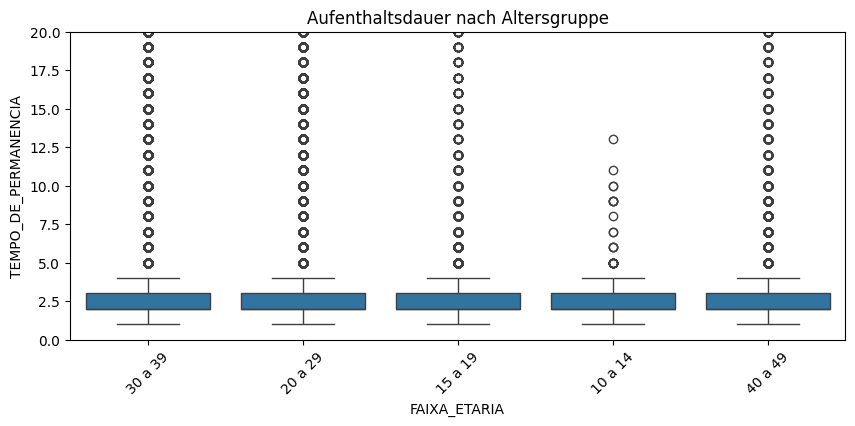

In [13]:

plt.figure(figsize=(10,4))
sns.boxplot(data=df[df["TEMPO_DE_PERMANENCIA"] >= 0],
            x="FAIXA_ETARIA", y="TEMPO_DE_PERMANENCIA")
plt.xticks(rotation=45)
plt.title("Aufenthaltsdauer nach Altersgruppe")
plt.ylim(0, 20)  # für Übersicht evtl. begrenzen
plt.show()